## Neural Network classification with PyTorch

In [1]:
import torch 
from torch import nn

## 1. Make classification data and get it ready

In [2]:
!pip install -U pip setuptools wheel
!pip install -U scikit-learn
# or pin a version:
# !pip install scikit-learn==1.5.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
pandas-gbq 0.29.1 requires google-api-core<3.0.0,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
bigframes 2.8.0 requires google-cloud-bigquery[bqstor

In [3]:
import sklearn
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

# create circles 
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42
                   )
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
# make DataFrame of circle data 
import pandas as pd 
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


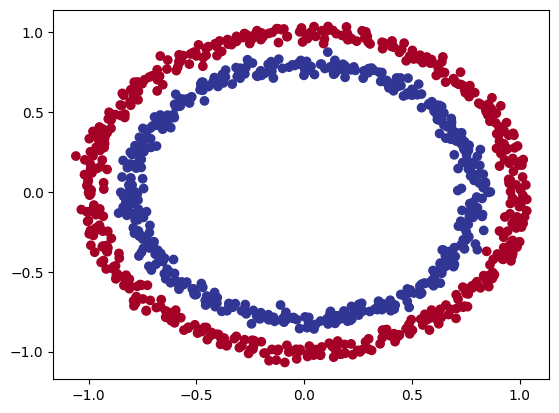

In [7]:
# visualize 
import matplotlib.pyplot as plt 

plt.scatter(x=X[:,0], 
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu
           )

### 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
import torch 
torch.__version__

'2.6.0+cu124'

In [11]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
# split data into training and test set
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model
To classify our blue and red dots
1. setup device sgnostic code so our code will run on an accelerator (GPU) if there is one
2. construct a model (by subclassing `nn.Module`)
3. define a loss function and optimizer
4. create a training and test loop

In [14]:
import torch 
from torch import nn 

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

we've setup device agnostic code, now let's create a model that:
1. subclasses `nn.Module`
2. Create 2 `nn.Linear()`layers that are capable of handling the shapes of our data
3. defines a `forward()` method that outlines the forward pass
5. instantiate an instance of our model class and send it to the target `device`

In [15]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(
            in_features = 2, 
            out_features = 5 
        )
        self.layer_2 = nn.Linear(
            in_features = 5, # takes in 5 features from previous layer
            out_features = 1 # output layer for binary classification
        )
        # self.two_linear_layers = nn.Sequential(
        #    nn.Linear(in_features=2, out_features=5),
        #    nn.Linear(in_features=5, out_features=1)
        # )
    
    # 3. define a forward() method that outlines forward pass
    def forward(self, x):
        # x(input) -> layer_1 -> layer_2 -> output
        return self.layer_2(self.layer_1(x))
        # return two_linear_layers(x)



# 4. instantiate an instance of our model class and send it to the target device 
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
next(model_0.parameters()).device

device(type='cpu')

In [17]:
# let's replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3183,  0.5018],
                      [ 0.1926, -0.3372],
                      [-0.1204, -0.2268],
                      [-0.3029, -0.3086],
                      [-0.5006,  0.3603]])),
             ('0.bias', tensor([ 0.1210, -0.1255, -0.3764, -0.3223,  0.4879])),
             ('1.weight',
              tensor([[-0.2970,  0.3220, -0.3826, -0.2558, -0.4051]])),
             ('1.bias', tensor([0.0545]))])

### 2.1 Setup loss function and optimizer 

Which loss function or optimizer should you use? This is problem specific 

* For example for regression we might want MAE or MSE 
* For classification we might want binary cross entropy or categorical cross entropy
* For optimizers, two of the most common are Adam or SGD
* For the loss function we're going to use `torch.nn.BECWithLositsLoss`
    * **Logit** : the layer that feeds in to softmax

In [19]:
# setup the loss function 
# loss_fn = nn.BCELoss() # BCELoss requires inputs to have gone through the sigmoid activation function prior to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss= with sigmoid activation function built-in 

# setup the optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [20]:
# calculate accuracy = out of 100 examples, what percentage does our classifier get right?
def accuracy_fn(y_pred, y_true):
    correct = torch.eq(y_pred, y_true).sum().item()
    acc = correct/len(y_pred) * 100 
    return acc 

## 3. Train Model 
To train our model, we're going to need to build a training loop: 
1. Forward pass
2. Calculate the loss
3. Optimizer to zero
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)


### 3.1 Going from raw logits -> prediction probabilities -> prediction labels 

* Our model outputs are going to be raw **logits**
* We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).
* Then we can convert our model's prediction probabilities to **prediction labels**by either rounding them or taking the argmax()

In [21]:
# view the first 5 outputs of the forward pass on the test data 
model_0.eval()
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2657],
        [-0.2170],
        [-0.1247],
        [-0.3068],
        [ 0.3021]], grad_fn=<SliceBackward0>)

In [22]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [23]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities 
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4340],
        [0.4460],
        [0.4689],
        [0.4239],
        [0.5749]], grad_fn=<SigmoidBackward0>)

For our prediction probability values, we need to perform a range-style rounding on them: 
* `y_pred_probs >= 0.5` --> `y=1` (class 1)
* `y_pred_probs < 0.5` --> `y=0` (class 0)

In [24]:
# find the predicted labels 
y_preds = torch.round(y_pred_probs)

# in full 
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test).to(device))[:5])

In [25]:
y_pred_labels, y_preds
# check for equality 
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension 
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.], grad_fn=<SqueezeBackward0>)

In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [27]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100 

# put data to target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# build training and evaluation loop 
for epoch in range(epochs):
    # training 
    model_0.train()

    # forward pass 
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels 
    
    # calculate loss/accuracy 
    loss = loss_fn(
        y_logits, # because we are using loss_fn=BCEWithLogitsLoss, simple BCELoss would expect y_probs
        y_train
    )
    # loss = BCELoss(torch.sigmoid(y_logits)) # we would use y_probs

    acc = accuracy_fn(
        y_pred=y_pred, 
        y_true=y_train
    )

    # Optimizer zero grad 
    optimizer.zero_grad()

    # Loss Backward (backpropagation)
    loss.backward()

    # Optimizer step (gradient descent)
    optimizer.step() 

    ### Testing 
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        # calculate test loss/accuracy 
        test_loss = loss_fn(
            test_logits,
            y_test
        )
        test_accuracy = accuracy_fn(
            test_preds, 
            y_test
        )

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test_loss: {test_loss} | Test_acc: {test_accuracy:.2f}")







Epoch: 0 | Loss: 0.70121 | Acc: 50.62% | Test_loss: 0.6977531909942627 | Test_acc: 49.00
Epoch: 10 | Loss: 0.69963 | Acc: 50.62% | Test_loss: 0.6968293190002441 | Test_acc: 47.50
Epoch: 20 | Loss: 0.69843 | Acc: 50.62% | Test_loss: 0.6961663961410522 | Test_acc: 48.00
Epoch: 30 | Loss: 0.69749 | Acc: 50.25% | Test_loss: 0.6956756114959717 | Test_acc: 50.00
Epoch: 40 | Loss: 0.69675 | Acc: 50.38% | Test_loss: 0.6953058838844299 | Test_acc: 50.00
Epoch: 50 | Loss: 0.69614 | Acc: 50.38% | Test_loss: 0.6950249671936035 | Test_acc: 50.50
Epoch: 60 | Loss: 0.69565 | Acc: 50.12% | Test_loss: 0.6948109269142151 | Test_acc: 51.00
Epoch: 70 | Loss: 0.69524 | Acc: 50.12% | Test_loss: 0.6946479678153992 | Test_acc: 51.00
Epoch: 80 | Loss: 0.69490 | Acc: 49.75% | Test_loss: 0.6945245862007141 | Test_acc: 53.50
Epoch: 90 | Loss: 0.69462 | Acc: 49.88% | Test_loss: 0.6944323182106018 | Test_acc: 52.50


In [28]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

## 4.Make predictions and evaluate the model 
From metrics it looks like out model isn't learning anything. 
So to inspect it let's make some predictions and make them visual

source: [helper_functions.py](https://github.com/mrdbourke/pytorch-deep-learning/blob/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/helper_functions.py#L4)

In [29]:
import requests 
from pathlib import Path 

## Download helper function 
if Path("helper_functions.py").is_file():
    print("helper functions.py already exists, skipping download")
else: 
    print("Download helper_functions.py")
    request = requests.get("https://raw.github.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f: # wb = write binary
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary


Download helper_functions.py


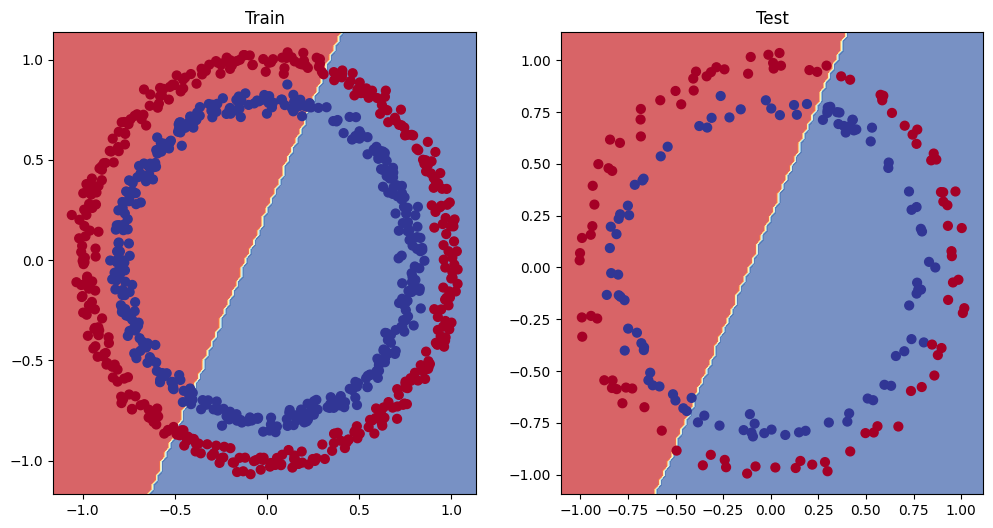

In [30]:
 # plot decision boundary of the model 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # #rows, #cols, index the subplot will appear into
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


## 5. Improving a model (from a model perspective)
* Add more layers - give the model chances to learn about patterns in the data
* Add more hidden units - e.g. go from 5 hidden units to 10 hidden units
* Fit for longer (add epochs)
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we can change, they are referred to **hyperparameters**.


Let's try to 
* Add more hidden units: 5->10
* Increase the #layers: 2->3
* Increase #epochs: 100->1000

In [31]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(
            in_features=2, 
            out_features=10
        )
        self.layer_2 = nn.Linear(
            in_features=10,
            out_features=10
        )
        self.layer_3 = nn.Linear(
            in_features=10, 
            out_features=1
        )

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed up where possible behind the scenes
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    model_1.parameters(),
    lr=0.1
)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# train for longer 
epochs = 1000

# data on target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # training 
    model_1.train()

    # forward pass 
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels 

    # calculate loss and accuracy 
    loss = loss_fn(
        y_logits, 
        y_train
    )
    acc = accuracy_fn(
        y_true=y_train,
        y_pred=y_pred
    )

    # optimizer zero grad 
    optimizer.zero_grad()

    # loss backward 
    loss.backward()

    # optimizer step 
    optimizer.step()

    ## testing 
    model_1.eval()
    with torch.inference_mode():
        # forward pass 
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # calculate loss and accuracy 
        test_loss = loss_fn(
            test_logits,
            y_test
        )
        test_acc = accuracy_fn(
            y_true = y_test,
            y_pred = test_pred
        )


    if epoch % 100 == 0 :
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.69261 | Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test loss: 0.69379 | Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299 | Acc: 51.12% | Test loss: 0.69437 | Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.62% | Test loss: 0.69458 | Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.12% | Test loss: 0.69465 | Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69467 | Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test Acc: 46.00%


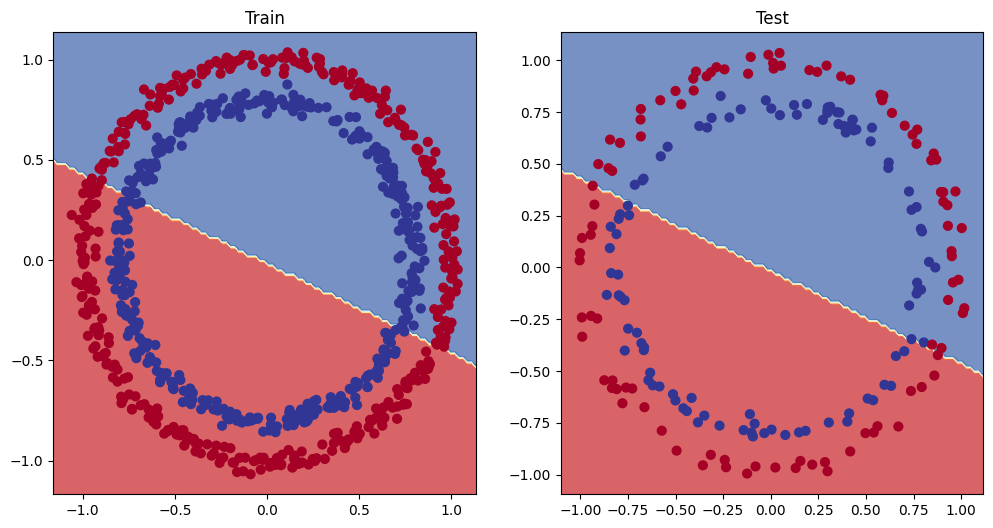

In [33]:
# plot decision boundary of model_1
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # #rows, #cols, index the subplot will appear into
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


### 5.1 Prepare data to see if our model can fit a straight line 
One way to troubleshoot to a larger problem is to test out a smaller problem

In [34]:
weight = 0.7 
bias = 0.3 
start = 0
end = 1
step = 0.01 

# create data 
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias 

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [35]:
# train and test split 
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

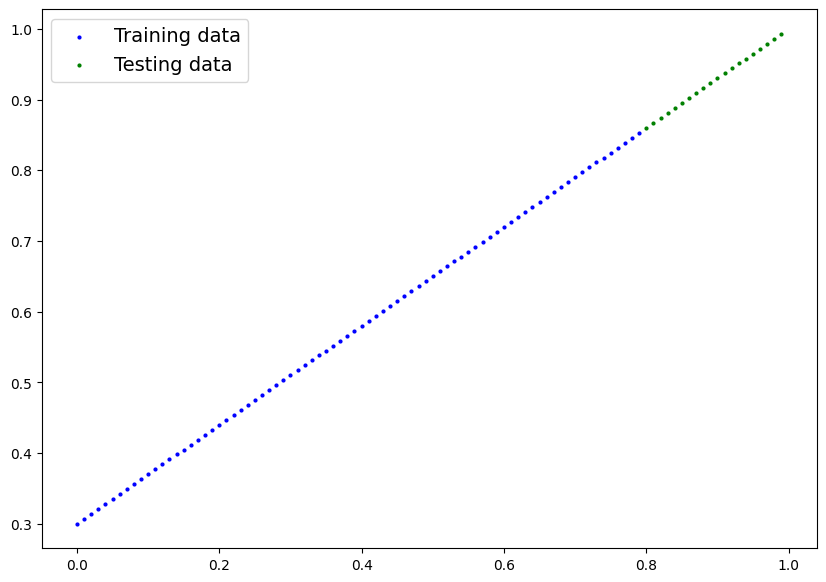

In [36]:
plot_predictions(X_train_regression,
                 y_train_regression,
                 X_test_regression,
                 y_test_regression)

#### 5.2 Adjusting `model_1` to fit a straight line

In [37]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
# same architecture as model_1 but using nn.Sequential
# only difference: in_features = 1 

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(
    params=model_2.parameters(),
    lr=0.01
)

# Train the model 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing 
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(
            test_pred, 
            y_test_regression
        )

    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


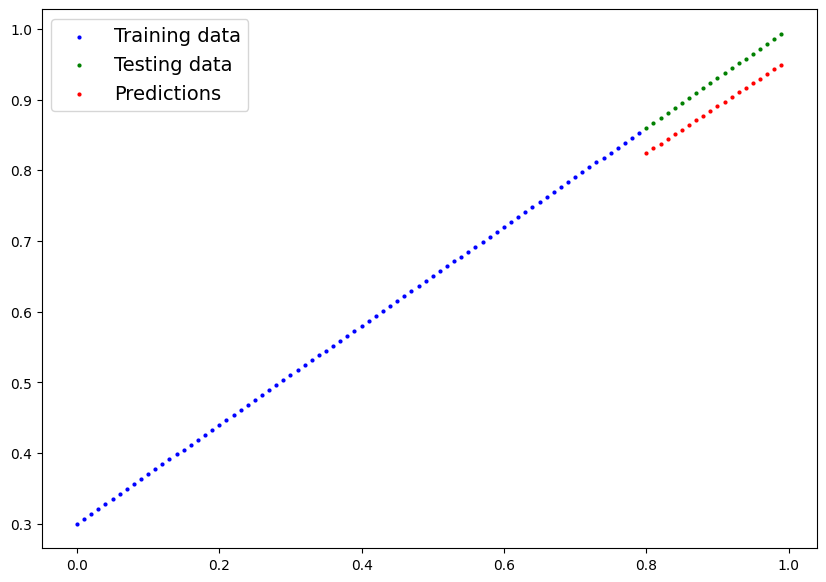

In [40]:
# turn on evaluation mode 
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# .cpu() needed because we need to use numpy
plot_predictions(
    X_train_regression.cpu(),
    y_train_regression.cpu(),
    X_test_regression.cpu(),
    y_test_regression.cpu(),
    y_preds
)

## 6. The missing piece: Non-Linearity 
What patterns could you draw if you were given an infinite amount of straight and non-straight lines?

Or, in ML terms, an infinite (but really it is finite) of linear and non-linear functions?

#### 6.1 Recreating non-linear data (red and blue circles)

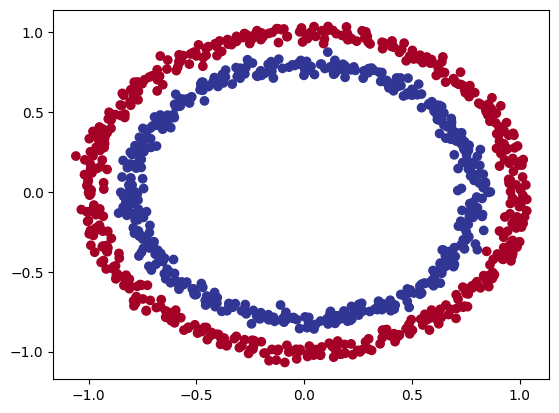

In [41]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 

n_n_samples = 1000
X, y = make_circles(
    n_samples, 
    noise = 0.03, 
    random_state = 42
)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [42]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split 

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2, 
    random_state = 42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity 


In [43]:
# build a model with non-linear activation function
from torch import nn 

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(
            in_features=2, 
            out_features=10
        ) 
        self.layer_2 = nn.Linear(
            in_features=10, 
            out_features=10
        )
        self.layer_3 = nn.Linear(
            in_features=10,
            out_features=1
        )
        # relu is a non-linear activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

Artificial NN are a large combination of linear and non linear functions which are potentially able to find patterns in data

In [44]:
# setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    model_3.parameters(),
    lr=0.1
)

In [45]:
model_3.state_dict()
# ReLU does not have any parameter to optimize 

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [46]:
## training a model with non-linearity 

torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000 

for epoch in range(epochs):
    model_3.train() 

    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) 

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    
    optimizer.zero_grad()

    loss.backward() 

    optimizer.step() 

    ## testing 
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69295, Acc: 50.00 | Test Loss: 0.69319, Test acc: 50.00
Epoch: 100 | Loss: 0.69115, Acc: 52.88 | Test Loss: 0.69102, Test acc: 52.50
Epoch: 200 | Loss: 0.68977, Acc: 53.37 | Test Loss: 0.68940, Test acc: 55.00
Epoch: 300 | Loss: 0.68795, Acc: 53.00 | Test Loss: 0.68723, Test acc: 56.00
Epoch: 400 | Loss: 0.68517, Acc: 52.75 | Test Loss: 0.68411, Test acc: 56.50
Epoch: 500 | Loss: 0.68102, Acc: 52.75 | Test Loss: 0.67941, Test acc: 56.50
Epoch: 600 | Loss: 0.67515, Acc: 54.50 | Test Loss: 0.67285, Test acc: 56.00
Epoch: 700 | Loss: 0.66659, Acc: 58.38 | Test Loss: 0.66322, Test acc: 59.00
Epoch: 800 | Loss: 0.65160, Acc: 64.00 | Test Loss: 0.64757, Test acc: 67.50
Epoch: 900 | Loss: 0.62362, Acc: 74.00 | Test Loss: 0.62145, Test acc: 79.00


#### 6.4 Evaluating a model trained with non-linear activation functions 

In [47]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

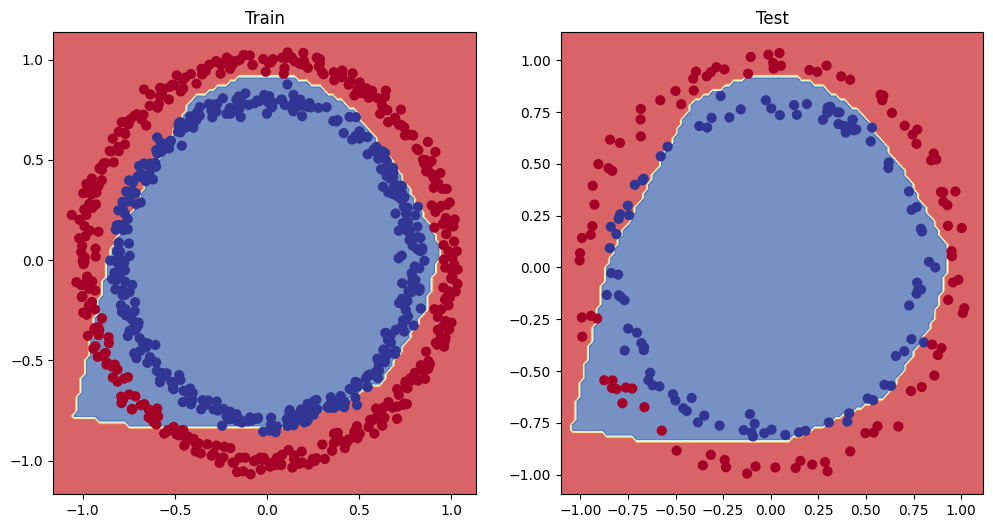

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

